In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from dataset import MonuSegDataSet
from Sampler import DinoPoweredSampler
import matplotlib.pyplot as plt
from auxilary.utils import *


In [2]:
config = readConfig("config.sys")

loading Images from path: Dataset/trainNormal/


100%|██████████| 85536/85536 [02:55<00:00, 488.02it/s] 
Using cache found in /home/blue/.cache/torch/hub/facebookresearch_dinov2_main
xFormers not available
xFormers not available
100%|██████████| 42768/42768 [13:12<00:00, 53.99it/s]


Unique clusters: [0 1 2 3 4 5 6 7 8]


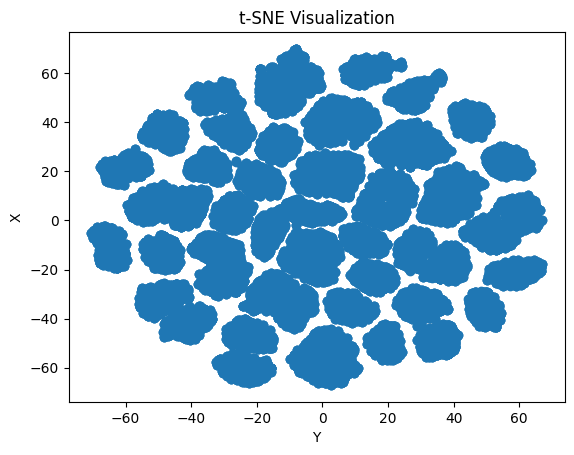

In [3]:


trainPaths = config["trainDataset"]
sampleTrainImages = load_images(trainPaths)
dino_model = load_sampling_model(modelType="small")
train_dataset = MonuSegDataSet(config["trainDataset"])

sampler = DinoPoweredSampler(images=sampleTrainImages, dino_model=dino_model, config=config)
train_data = DataLoader(train_dataset,batch_size=config["batch_size"], sampler=sampler)

In [ ]:
# Test DataLoader
batch_count = 0
for i, batch in enumerate(train_data):
    batch_count += 1
    print(f"Batch {i+1} of size {len(batch)}")
    # For visualization, let's assume each element in the batch is an image
    for j, image in enumerate(batch):
        plt.subplot(4, 4, j+1)
        plt.imshow(image)
    plt.show()

print(f"Total batches: {batch_count}")